In [1]:
# from db_connection import DB_Connection
# import Tweet
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import TextBox
import re, json
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('../data.csv', encoding='utf-8')

## Text classification

In [2]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import metrics
import xgboost as xgb
import time

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(max_features=700, min_df=5, max_df=0.7)
X11 = vectorizer1.fit_transform(df.clean_text).toarray()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X11, df.isincident, test_size=0.2, random_state=0)

In [37]:
from collections import Counter
counts = Counter(' '.join(df.clean_text).split())
# short_df.isaccident.isnull() & short_df.clean_text.notnull()
# freq = pd.DataFrame(counts.most_common(5000), columns=['word', 'count'])
# freq

In [ ]:
X11 = vectorizer1.fit_transform(df.clean_text).toarray()
X_vect = vect.transform(classified.clean).toarray()

## Boosting Model

Most important hyperparameters of Random Forest:


n_estimators = n of trees

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

### Classifier preliminar

In [23]:
# learning_rate=0.01,
#     n_estimators=5000,
#     max_depth=9, min_child_weight=1,
#     gamma=0.1, subsample=1, colsample_bytree=0.9,
#     nthread=4, seed=27, verbosity=1
# Duration: 258.65365839004517
# 0.9211790676535515
# xgb1.fit(X_train, y_train, eval_metric='error', eval_set=evalset)

start = time.time()
ranfor = RandomForestClassifier(n_jobs=4)
# Duration: 94.73229241371155
# 0.9325412284118946
# evalset = [(X_train, y_train), (X_test,y_test)]
ranfor.fit(X_train, y_train)
end = time.time()
print('Duration:', str(end-start))

y_pred = ranfor.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Duration: 76.78316831588745
[[ 8745   968]
 [ 1129 19962]]
              precision    recall  f1-score   support

       False       0.89      0.90      0.89      9713
        True       0.95      0.95      0.95     21091

    accuracy                           0.93     30804
   macro avg       0.92      0.92      0.92     30804
weighted avg       0.93      0.93      0.93     30804

0.9319244253992988


In [ ]:
rf_con = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rf_con.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rf_con.flatten()/np.sum(rf_con)]
labels = ['%s\n%s\n%s' % (v1, v2, v3) for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,4))
sns.heatmap(rf_con/np.sum(rf_con), annot=labels, fmt='', cmap='Blues')
plt.title('Matriz de confusión para Random Forest', fontsize=14)
plt.show()

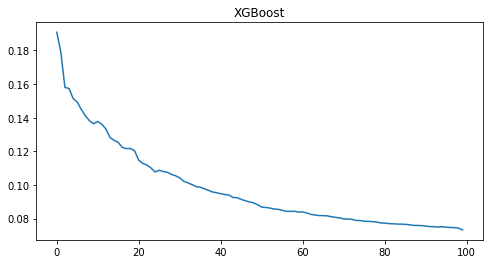

In [26]:
results = xgb.evals_result()
ys = results['validation_0']['error']
xs = [i for i in range(len(ys))]


plt.figure(figsize=(8,4))
plt.title('XGBoost')
# plt.subplot(1, 2, 1)
sns.lineplot(x=xs, y=ys)
plt.show()

#### Estimators adjust

In [ ]:
for i in [128,256,512,1024,2048,4096,8192]:
    print('\nPrediction with:', str(i))
    start = time.time()
    ranfor = RandomForestClassifier(n_estimators=i, random_state=0)
    ranfor.fit(X_train, y_train)
    end = time.time()
    y_pred = ranfor.predict(X_test)
    print(str(end-start), accuracy_score(y_test, y_pred))
    resume.append([i, end-start, accuracy_score(y_test, y_pred),
        confusion_matrix(y_test,y_pred), classification_report(y_test,y_pred)])

In [ ]:
xs = [i[0] for i in resume]
ys = [i[1] for i in resume]
zs = [i[2] for i in resume]

plt.figure(figsize=(11,4))
plt.title('XGBoost')
plt.subplot(1, 2, 1)
sns.pointplot(x=xs, y=ys)
# sns.lineplot(x=range(len(xs)), y=ys, markers=True, style='event')
plt.title('Duración de entrenamiento')
plt.xticks(range(len(xs)), xs)
plt.subplot(1, 2, 2)
sns.pointplot(x=xs, y=zs)
plt.title('Precisión obtenida')
plt.xticks(range(len(xs)), xs)
plt.show()

### Parameter tuning

In [6]:
param_test = {
 'n_estimators':range(100, 1100, 100)
}

print(time.asctime())
start = time.time()
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_jobs=4), 
                        param_grid = param_test, scoring='accuracy', n_jobs=1, cv=3, verbose=3)
gsearch.fit(X_train, y_train)
end = time.time()
print(str(end-start))
grid_results = pd.DataFrame(gsearch.cv_results_)
grid_results.sort_values('rank_test_score').head(5)
grid_results.to_csv('grid_search_est.csv')
gsearch.best_params_, gsearch.best_score_

Sun Sep 26 00:48:10 2021
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ...............................n_estimators=100; total time= 1.5min
[CV 2/3] END ...............................n_estimators=100; total time= 1.2min
[CV 3/3] END ...............................n_estimators=100; total time= 1.1min
[CV 1/3] END ...............................n_estimators=200; total time= 1.7min
[CV 2/3] END ...............................n_estimators=200; total time= 1.7min
[CV 3/3] END ...............................n_estimators=200; total time= 1.7min
[CV 1/3] END ...............................n_estimators=300; total time= 2.5min
[CV 2/3] END ...............................n_estimators=300; total time= 2.5min
[CV 3/3] END ...............................n_estimators=300; total time= 2.5min
[CV 1/3] END ...............................n_estimators=400; total time= 3.3min
[CV 2/3] END ...............................n_estimators=400; total time= 3.3min
[CV 3/3] END ..........

({'n_estimators': 1000}, 0.9283279577065912)

#### Tests

In [18]:
param_test0 = {
 'max_depth':range(100, 1100, 100)
}

print(time.asctime())
start = time.time()
gsearch0 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=4), 
                        param_grid = param_test0, scoring='accuracy', n_jobs=1, cv=3, verbose=3)
gsearch0.fit(X_train, y_train)
end = time.time()
print(str(end-start))
grid_results0 = pd.DataFrame(gsearch0.cv_results_)
grid_results0.sort_values('rank_test_score').head(5)
grid_results0.to_csv('grid_search0.csv')
gsearch0.best_params_, gsearch0.best_score_

Sun Sep 26 12:55:32 2021
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..................................max_depth=100; total time= 1.7min
[CV 2/3] END ..................................max_depth=100; total time= 1.6min
[CV 3/3] END ..................................max_depth=100; total time= 1.8min
[CV 1/3] END ..................................max_depth=200; total time= 2.2min
[CV 2/3] END ..................................max_depth=200; total time= 2.2min
[CV 3/3] END ..................................max_depth=200; total time= 2.1min
[CV 1/3] END ..................................max_depth=300; total time= 2.2min
[CV 2/3] END ..................................max_depth=300; total time= 2.2min
[CV 3/3] END ..................................max_depth=300; total time= 2.2min
[CV 1/3] END ..................................max_depth=400; total time= 2.2min
[CV 2/3] END ..................................max_depth=400; total time= 2.2min
[CV 3/3] END ..........

({'max_depth': 400}, 0.927605635083185)

In [ ]:
param_test1 = {
 'min_sample_split':[0.5, 1, 2, 10, 20, 30, 50, 70, 100]
}

print(time.asctime())
start = time.time()
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=200, max_depth=400, n_jobs=4), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=1, cv=3, verbose=3)
gsearch1.fit(X_train, y_train)
end = time.time()
print(str(end-start))
grid_results1 = pd.DataFrame(gsearch1.cv_results_)
# grid_results1.sort_values('rank_test_score').head(5)
grid_results1.to_csv('grid_search1.csv')
gsearch1.best_params_, gsearch1.best_score_

### Last Classifier

In [8]:
xgb1 = XGBClassifier(
    learning_rate=0.01,
    n_estimators=5000,
    max_depth=9, min_child_weight=1,
    gamma=0.1, subsample=1, colsample_bytree=0.9,
    nthread=4, seed=27, verbosity=1)

xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(X_train, label=y_train)
print('Starting cross-validation...')
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], 
    metrics='error', nfold=3, early_stopping_rounds=50)
xgb1.set_params(n_estimators=cvresult.shape[0])
print('Estimators:', cvresult.shape[0])

Starting cross-validation...
Estimators: 2627


Start training.


C:\Users\lucia\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.16038	validation_1-error:0.15845
[1]	validation_0-error:0.15492	validation_1-error:0.15254
[2]	validation_0-error:0.15645	validation_1-error:0.15417
[3]	validation_0-error:0.15465	validation_1-error:0.15261
[4]	validation_0-error:0.15136	validation_1-error:0.14914
[5]	validation_0-error:0.15422	validation_1-error:0.15251
[6]	validation_0-error:0.15825	validation_1-error:0.15693
[7]	validation_0-error:0.15897	validation_1-error:0.15735
[8]	validation_0-error:0.15979	validation_1-error:0.15845
[9]	validation_0-error:0.15988	validation_1-error:0.15855
[10]	validation_0-error:0.15923	validation_1-error:0.15823
[11]	validation_0-error:0.15927	validation_1-error:0.15832
[12]	validation_0-error:0.15979	validation_1-error:0.15868
[13]	validation_0-error:0.15915	validation_1-error:0.15813
[14]	validation_0-error:0.15941	validation_1-error:0.15849
[15]	validation_0-error:0.15922	validation_1-error:0.15819
[16]	validation_0-error:0.15887	validation_1-error:0.15784
[17]	va

Text(0, 0.5, 'Feature Importance Score')

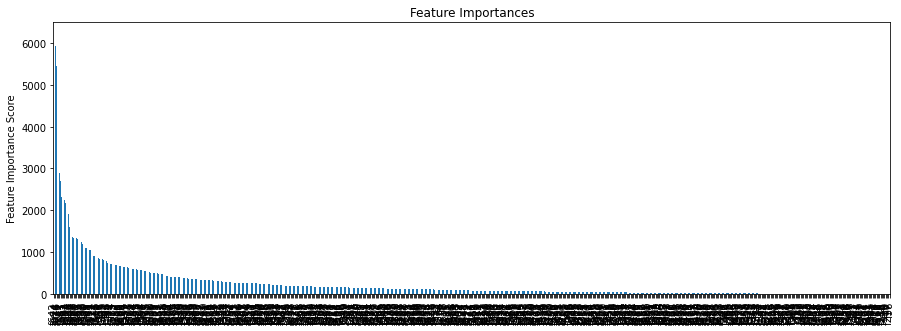

In [9]:
#Fit the algorithm on the data
print('Start training.')
start = time.time()

# xgb1.fit(X_train, y_train, verbose=True)
evalset = [(X_train, y_train), (X_test,y_test)]
xgb1.fit(X_train, y_train, eval_metric='error', eval_set=evalset)
print('End training.') 
end = time.time()

with open('xgb1_model', 'wb') as picklefile:
    pickle.dump(xgb1, picklefile)
    
#Predict training set:
dtrain_predictions = xgb1.predict(X_test)
dtrain_predprob = xgb1.predict_proba(X_test)[:,1]
    
#Print model report:
print("\nModel Report")
print("Duration:", str(end-start))
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtrain_predictions))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))
                
plt.figure(figsize=(15,5))
feat_imp = pd.Series(xgb1.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [11]:
#Print model report:
print("\nModel Report")
print("Duration:", str(end-start))
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtrain_predictions))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))


Model Report
Duration: 4889.771062135696
Accuracy : 0.9239
AUC Score (Train): 0.976660


Text(0, 0.5, 'Feature Importance Score')

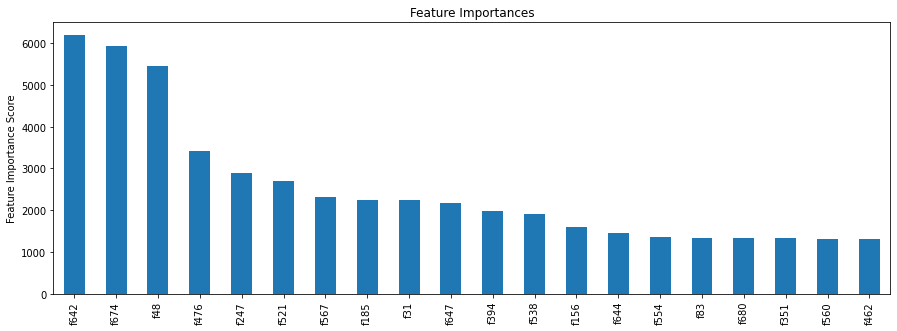

In [12]:
plt.figure(figsize=(15,5))
feat_imp = pd.Series(xgb1.get_booster().get_fscore()).sort_values(ascending=False).head(20)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

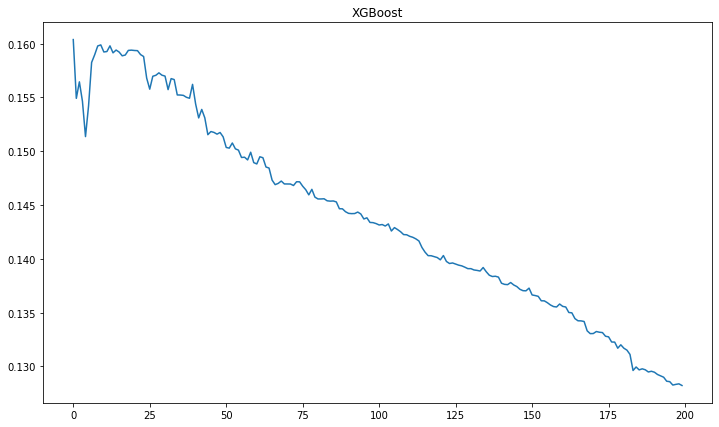

In [26]:
results = xgb1.evals_result()
ys = results['validation_0']['error'][:200]
xs = [i for i in range(len(ys))]

plt.figure(figsize=(12,7))
plt.title('XGBoost')
# plt.subplot(1, 2, 1)
sns.lineplot(x=xs, y=ys)
plt.show()

### Estimators adjust

In [6]:
rfresume = []
rf_arr = []

for i in [100, 200, 300, 500, 700, 1000, 1200, 1500, 1800, 2000, 2500]: # 3000, 3500, 4000, 5000]:
    print('\nestimators:', str(i))
    start = time.time()
    rf = RandomForestClassifier(n_estimators=i, n_jobs=6)
    rf_arr.append(rf)
    print('Fitting... ', time.asctime())
    rf_arr[-1].fit(X_train, y_train)
    end = time.time()
    print('Predicting... ', time.asctime())
    y_rf = rf_arr[-1].predict(X_test)
    print(str(end-start), accuracy_score(y_test, y_rf))
    rfresume.append([i, end-start, accuracy_score(y_test, y_rf), confusion_matrix(y_test,y_rf), classification_report(y_test,y_rf)])
    with open('rfresume0', 'wb') as picklefile:
        pickle.dump(rfresume, picklefile)
    with open('rfarr0', 'wb') as picklefile:
        pickle.dump(rf_arr, picklefile)


estimators: 100
Fitting...  Mon Sep 27 22:55:33 2021
Predicting...  Mon Sep 27 22:56:40 2021
66.6210584640503 0.931145305804441

estimators: 200
Fitting...  Mon Sep 27 22:56:41 2021
Predicting...  Mon Sep 27 22:59:12 2021
151.52027988433838 0.9323789118296325

estimators: 300
Fitting...  Mon Sep 27 22:59:15 2021
Predicting...  Mon Sep 27 23:02:57 2021
222.17574381828308 0.9325736917283469

estimators: 500
Fitting...  Mon Sep 27 23:03:04 2021
Predicting...  Mon Sep 27 23:09:14 2021
369.7006936073303 0.9321516686144656

estimators: 700
Fitting...  Mon Sep 27 23:09:24 2021
Predicting...  Mon Sep 27 23:18:11 2021
526.1876127719879 0.9325736917283469

estimators: 1000
Fitting...  Mon Sep 27 23:18:30 2021
Predicting...  Mon Sep 27 23:30:59 2021
749.099463224411 0.9329307882093235

estimators: 1200
Fitting...  Mon Sep 27 23:32:03 2021
Predicting...  Mon Sep 27 23:47:01 2021
898.3289136886597 0.9331904947409427

estimators: 1500
Fitting...  Mon Sep 27 23:49:23 2021
Predicting...  Tue Sep 28 0

MemoryError: 

In [5]:
with open('rf_tests/rfresume0', 'rb') as picklefile:
    rfresume = pickle.load(picklefile)

In [48]:
for i in rfresume:
    print(i[4])
    # for s in i[1]: print(s)
    # print('\n')

              precision    recall  f1-score   support

       False       0.88      0.90      0.89      9713
        True       0.95      0.95      0.95     21091

    accuracy                           0.93     30804
   macro avg       0.92      0.92      0.92     30804
weighted avg       0.93      0.93      0.93     30804

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      9713
        True       0.95      0.95      0.95     21091

    accuracy                           0.93     30804
   macro avg       0.92      0.92      0.92     30804
weighted avg       0.93      0.93      0.93     30804

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      9713
        True       0.95      0.95      0.95     21091

    accuracy                           0.93     30804
   macro avg       0.92      0.92      0.92     30804
weighted avg       0.93      0.93      0.93     30804

              preci

In [62]:
resume = pd.DataFrame([i[4].split('\n')[1:4] for i in rfresume])
res = pd.DataFrame(i[2] for i in resume.iloc[:, 2].str.split('\s+'))
res

,0
0,0.95
1,0.95
2,0.95
3,0.95
4,0.95
5,0.95
6,0.95
7,0.95
8,0.95
9,0.95


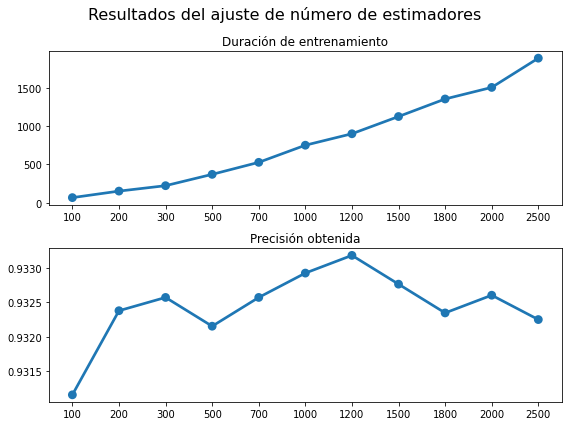

In [13]:
xs = [i[0] for i in rfresume]
ys = [i[1] for i in rfresume]
zs = [i[2] for i in rfresume]

plt.figure(figsize=(8,6))
plt.suptitle('Resultados del ajuste de número de estimadores', fontsize=16)
plt.subplot(2, 1, 1)
sns.pointplot(x=xs, y=ys)
plt.title('Duración de entrenamiento')
plt.xticks(range(len(xs)), xs)
plt.subplot(2, 1, 2)
sns.pointplot(x=xs, y=zs)
plt.title('Precisión obtenida')
plt.xticks(range(len(xs)), xs)
plt.tight_layout()
plt.show()

In [15]:
with open('xgbresume0', 'wb') as picklefile:
    pickle.dump(rfresume, picklefile)
with open('xgbarr0', 'wb') as picklefile:
    pickle.dump(rf_arr, picklefile)

MemoryError: 

In [ ]:
xgresume1 = []
xgb_arr1 = []

for i in [600,700,800,900]:
    print('\nestimators:', str(i))
    start = time.time()
    xgb = RandomForestClassifier(max_depth=200, n_jobs=4)
    xgb_arr1.append(xgb)
    xgb_arr1[-1].fit(X_train, y_train)
    end = time.time()
    y_xgb = xgb_arr1[-1].predict(X_test)
    print(str(end-start), accuracy_score(y_test, y_xgb))
    xgresume1.append([i, end-start, accuracy_score(y_test, y_xgb),
    confusion_matrix(y_test,y_xgb), classification_report(y_test,y_xgb)])

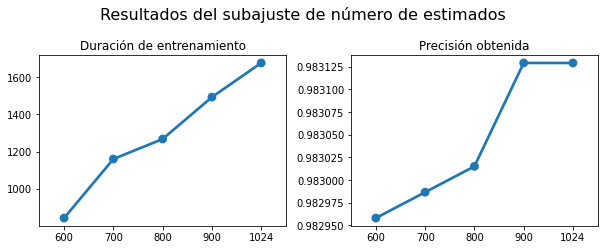

In [87]:
xs = [i[0] for i in xgresume1] + [xgresume[1][0]]
ys = [i[1] for i in xgresume1] + [xgresume[1][1]]
zs = [i[2] for i in xgresume1] + [xgresume[1][2]]

plt.figure(figsize=(8.5,3.5))
plt.suptitle('Resultados del subajuste de número de estimados', fontsize=16)
plt.subplot(1, 2, 1)
sns.pointplot(x=xs, y=ys)
plt.title('Duración de entrenamiento')
plt.xticks(range(len(xs)), xs)
plt.subplot(1, 2, 2)
sns.pointplot(x=xs, y=zs)
plt.title('Precisión obtenida')
plt.xticks(range(len(xs)), xs)
plt.tight_layout()
plt.show()

In [92]:
with open('xgbresume1', 'wb') as picklefile:
    pickle.dump(xgresume1, picklefile)
with open('xgbarr1', 'wb') as picklefile:
    pickle.dump(xgb_arr1, picklefile)

In [8]:
print('\nestimators: 1000')
start = time.time()
xgb_final = XGBClassifier(
    learning_rate=0.3,
    n_estimators=1000,
    max_depth=9, min_child_weight=1,
    gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,
    nthread=4, seed=27, eval_metric='error', verbosity=0)
xgb_final.fit(X_train, y_train)
end = time.time()
y_xgb = xgb_final.predict(X_test)
print(str(end-start), accuracy_score(y_test, y_xgb))


estimators: 700
1089.302880525589 0.9828726132801368


In [77]:
xgb_final = xgb_arr1[-1]
y_xgb = xgb_final.predict(X_test1)
xgb_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='error',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=900, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=27, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=0)

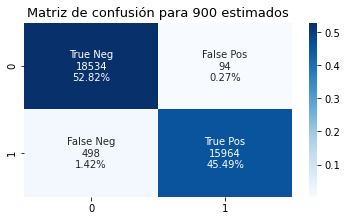

In [82]:
xgb_con = confusion_matrix(y_test1,y_xgb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                xgb_con.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     xgb_con.flatten()/np.sum(xgb_con)]
labels = ['%s\n%s\n%s' % (v1, v2, v3) for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,3.2))
sns.heatmap(xgb_con/np.sum(xgb_con), annot=labels, fmt='', cmap='Blues')
plt.title('Matriz de confusión para 900 estimados', fontsize=13)
plt.show()

In [25]:
with open('xgb_classifier', 'wb') as picklefile:
    pickle.dump(xgb_final, picklefile)

## Count vectors adjust

In [29]:
# load model
with open('xgb_classifier', 'rb') as training_model:
    xgb = pickle.load(training_model)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [10]:
resume2 = []
# arr2 = []

# for i in [600, 700, 800, 900, 1000, 1500]:
for i in [700, 1000, 1500, 2000, 2500, 3000, 4000, 5000]:
# for i in [1250, 1500, 1750, 2000, 2500]:
    print('\nnumber of features:', str(i))
    vectorizer = CountVectorizer(max_features=i, min_df=4, max_df=0.7)
    print('Fitting vectorizer...')
    vectorizer.fit(df.clean_text)
    with open(f'vectorizer{i}', 'wb') as picklefile:
        pickle.dump(vectorizer, picklefile)
    X_vect = vectorizer.transform(df.clean_text).toarray()
    print('Creating train-test data...')
    X_train, X_test, y_train, y_test = train_test_split(X_vect, df.isincident, test_size=0.2, random_state=0)
    print('Fitting model...', time.asctime())

    model = RandomForestClassifier(n_estimators=1200, n_jobs=4)
    # arr2.append(model)
    # with open('xgb_classifier', 'rb') as training_model:
    #     arr2.append(pickle.load(training_model))
    
    start = time.time()
    # evalset = [(X_train, y_train), (X_test,y_test)]
    # arr2[-1].fit(X_train,y_train) #, eval_metric='error', eval_set=evalset, verbose=False)
    model.fit(X_train,y_train)
    with open(f'rf_est{i}', 'wb') as picklefile:
        pickle.dump(model, picklefile)
    end = time.time()
    print('Fitting time:', str(end-start), '\nPredicting...')
    y_rf = model.predict(X_test)
    print(accuracy_score(y_test, y_rf))
    print(confusion_matrix(y_test,y_rf))
    print(classification_report(y_test,y_rf))
    resume2.append([i, end-start, accuracy_score(y_test, y_rf), confusion_matrix(y_test,y_rf), classification_report(y_test,y_rf)])
    with open('rfresume2', 'wb') as picklefile:
        pickle.dump(resume2, picklefile)


number of features: 700
Fitting vectorizer...
Creating train-test data...
Fitting model... Tue Sep 28 22:24:19 2021
Fitting time: 889.5989758968353 
Predicting...
0.9336449811712765
[[ 8753   960]
 [ 1084 20007]]
              precision    recall  f1-score   support

       False       0.89      0.90      0.90      9713
        True       0.95      0.95      0.95     21091

    accuracy                           0.93     30804
   macro avg       0.92      0.92      0.92     30804
weighted avg       0.93      0.93      0.93     30804


number of features: 1000
Fitting vectorizer...
Creating train-test data...
Fitting model... Tue Sep 28 22:39:24 2021
Fitting time: 1201.4836671352386 
Predicting...
0.934878587196468
[[ 8765   948]
 [ 1058 20033]]
              precision    recall  f1-score   support

       False       0.89      0.90      0.90      9713
        True       0.95      0.95      0.95     21091

    accuracy                           0.93     30804
   macro avg       0.92   

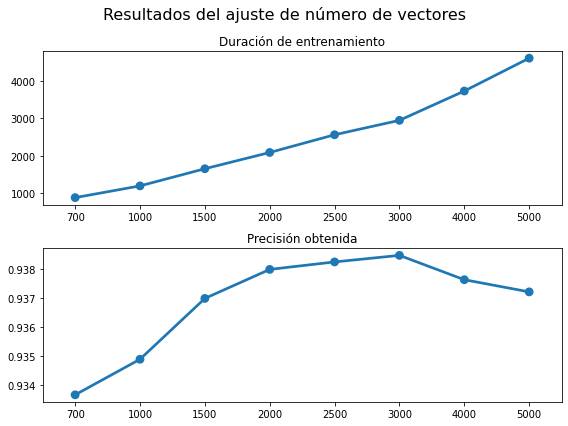

In [13]:
xg = resume2[:]

xs = [i[0] for i in xg]
ys = [i[1] for i in xg]
zs = [i[2] for i in xg]

plt.figure(figsize=(8,6))
plt.suptitle('Resultados del ajuste de número de vectores', fontsize=16)
plt.subplot(2, 1, 1)
sns.pointplot(x=xs, y=ys)
plt.title('Duración de entrenamiento')
plt.xticks(range(len(xs)), xs)
plt.subplot(2, 1, 2)
sns.pointplot(x=xs, y=zs)
plt.title('Precisión obtenida')
plt.xticks(range(len(xs)), xs)
plt.tight_layout()
plt.show()

In [63]:
# save final xgb model
with open('rf_tests/rfresume2', 'rb') as resume:
    resume2 = pickle.load(resume)

In [83]:
[i[4].split('\n')[1:4] for i in resume2]

[['',
  '       False       0.89      0.90      0.90      9713',
  '        True       0.95      0.95      0.95     21091'],
 ['',
  '       False       0.89      0.90      0.90      9713',
  '        True       0.95      0.95      0.95     21091'],
 ['',
  '       False       0.90      0.90      0.90      9713',
  '        True       0.96      0.95      0.95     21091'],
 ['',
  '       False       0.90      0.90      0.90      9713',
  '        True       0.96      0.95      0.95     21091'],
 ['',
  '       False       0.90      0.90      0.90      9713',
  '        True       0.96      0.95      0.95     21091'],
 ['',
  '       False       0.90      0.90      0.90      9713',
  '        True       0.96      0.95      0.96     21091'],
 ['',
  '       False       0.90      0.90      0.90      9713',
  '        True       0.95      0.95      0.95     21091'],
 ['',
  '       False       0.90      0.90      0.90      9713',
  '        True       0.95      0.95      0.95     21091']]

In [88]:
# resume = pd.DataFrame([i[4].split('\n')[1:4] for i in rfresume])
# res = pd.DataFrame(i[2] for i in resume.iloc[:, 2].str.split('\s+'))
res2 = pd.DataFrame([i[4].split('\n')[1:4] for i in resume2])
pd.DataFrame(i[2] for i in res2.iloc[:, 2].str.split('\s+'))
# res2

,0
0,0.95
1,0.95
2,0.96
3,0.96
4,0.96
5,0.96
6,0.95
7,0.95


## Final misc

In [15]:
# save final xgb model
with open('rf_est3000', 'rb') as resume:
    final2 = pickle.load(resume)

In [16]:
# load model fo 3000 features
with open('vectorizer3000', 'rb') as v:
    vect = pickle.load(v)

In [18]:
# convert and split data
X_vect = vect.transform(df.clean_text).toarray()
print('Creating train-test data...')
X_train, X_test, y_train, y_test = train_test_split(X_vect, df.isincident, test_size=0.2, random_state=0)
print('Done.')

Creating train-test data...
Done.


In [19]:
# predict test data
print('Predicting data...')
y_rf2 = final2.predict(X_test)
print(accuracy_score(y_test, y_rf2))
print(confusion_matrix(y_test,y_rf2))
print(classification_report(y_test,y_rf2))

Predicting data...
0.9384820153226854
[[ 8781   932]
 [  963 20128]]
              precision    recall  f1-score   support

       False       0.90      0.90      0.90      9713
        True       0.96      0.95      0.96     21091

    accuracy                           0.94     30804
   macro avg       0.93      0.93      0.93     30804
weighted avg       0.94      0.94      0.94     30804



In [16]:
rf_con= np.array([[8781,932],[963,20128]])

In [17]:
rf_con.flatten()

array([ 8781,   932,   963, 20128])

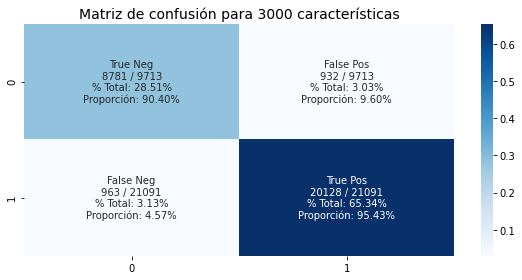

In [19]:
# rf_con = confusion_matrix(y_test,y_rf2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
counts = [8781+932, 8781+932, 963+20128, 963+20128]
group_counts = ['{0:0.0f}'.format(value) for value in
                rf_con.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rf_con.flatten()/np.sum(rf_con)]
group_accuracy = ['{0:.2%}'.format(value) for value in
                     rf_con.flatten()/counts]
labels = ['%s\n%s / %s\n%% Total: %s\nProporción: %s' % (v1, v2, v4, v3, v5) for v1, v2, v3, v4, v5 in
          zip(group_names,group_counts,group_percentages, counts, group_accuracy)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8, 4))
sns.heatmap(rf_con/np.sum(rf_con), annot=labels, fmt='', cmap='Blues')
plt.title('Matriz de confusión para 3000 características', fontsize=14)
plt.tight_layout()
plt.show()

In [56]:
final2.feature_importances_

array([2.32336780e-04, 3.61273897e-05, 2.87426998e-05, ...,
       8.66409414e-05, 2.23748181e-04, 5.43829091e-05])

Text(0.5, 0, '')

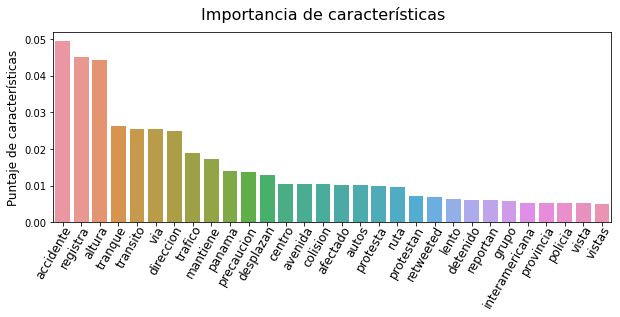

In [94]:
feat_df = pd.DataFrame(X_vect)
feat_df.columns = vect.get_feature_names()

plt.figure(figsize=(10,3.5))
# feat_imp = pd.Series(xgb_classifier.get_booster().get_fscore()).sort_values(ascending=False)[:40]
feat_imp = pd.Series(final2.feature_importances_).sort_values(ascending=False)[:30]
# feat_imp.plot(kind='bar', title='Feature] Importances')
# feat_values = [int(re.sub('f', '', i)) for i in feat_imp.index]
feat_values = [int(i) for i in feat_imp.index]
feat_names = [feat_df.columns[i] for i in feat_values]
features = pd.DataFrame({'feature_num':feat_values, 'names':feat_names, 'count':feat_imp.values})
# plt.bar(x=feat_values, height=feat_imp.values)
# sns.barplot(x=feat_values, y=feat_imp.values, data=feat_imp, order=feat_imp.values)
plt.suptitle('Importancia de características', fontsize=16)
# plt.subplot(2, 1, 1)
sns.barplot(x='names', y='count', data=features, labels=features.count)
plt.xticks(rotation=60, fontsize=12, ha='right', y=0.03, rotation_mode='anchor')
plt.ylabel('Puntaje de características', fontsize=12)
# plt.tight_layout()
plt.xlabel(None)